In [52]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bike-sharing-demand/sampleSubmission.csv
/kaggle/input/bike-sharing-demand/train.csv
/kaggle/input/bike-sharing-demand/test.csv


## import libraries

In [53]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [54]:
df=pd.read_csv('/kaggle/input/bike-sharing-demand/train.csv')

In [55]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


## data description
- datetime - hourly date + timestamp  
- season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- holiday - whether the day is considered a holiday
- workingday - whether the day is neither a weekend nor holiday
- weather -
    1. Clear, Few clouds, Partly cloudy, Partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- temp - temperature in Celsius
- atemp - "feels like" temperature in Celsius
- humidity - relative humidity
- windspeed - wind speed
- casual - number of non-registered user rentals initiated
- registered - number of registered user rentals initiated
- count - number of total rentals

In [56]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


## Data analysis
**Questions**
1. assume that causual pay 20 usd and registerd pay 5 usd we need calc the profit of a day
    - taxis = 14%
    - maintainance =1500 per year
2. destribution profit and count
3. profit for each day 
     - convert data time to day and year and hour
4. which season has more frofit
5. which weather has moer profit & count
6. correlation between profit and count with all features
7. rental and frofit during rush hour 7:9 and 2:5
8.registerd or causual is more
9.rental &profit during working day and holiday

#### calc profit and make it as a faeture

In [57]:
def profit(x):
    causual=x[0]
    registered  =x[1]
    taxis=.14
    price=causual*20+registered*5
    price_after_taxis=price-(price * taxis)
    all_profit_per_hour=price_after_taxis-(1500/(365*24))
    return all_profit_per_hour
    
df['profit']=df[['casual','registered']].apply(profit,axis=1)

In [58]:
df.sample(2)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,profit
791,2011-02-16 10:00:00,1,0,1,1,10.66,11.365,41,26.0027,14,55,69,477.128767
7792,2012-06-05 01:00:00,2,0,1,2,21.32,25.000,77,22.0028,2,18,20,111.628767


In [59]:
#destribution profit and count
df['profit'].describe()

count    10886.000000
mean      1288.280751
std       1309.683400
min          4.128767
25%        253.528767
50%        889.928767
75%       1891.828767
max       7881.728767
Name: profit, dtype: float64

In [60]:
df['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [61]:
df[df['profit']==df['profit'].max()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,profit
9415,2012-09-15 16:00:00,3,0,0,2,27.06,31.06,36,15.0013,350,433,783,7881.728767


In [62]:
df[df['count']==df['count'].max()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,profit
9345,2012-09-12 18:00:00,3,0,1,1,27.06,31.06,44,16.9979,91,886,977,5374.828767


In [63]:
#profit for each day

In [64]:
df['datetime']=pd.to_datetime(df['datetime'],format='%Y-%m-%d %H:%M:%S',errors='coerce')

In [228]:
df['year']=df['datetime'].dt.year
df['month_name']=df['datetime'].dt.month_name()
df['month']=df['datetime'].dt.month

df['day_of_weak']=df['datetime'].dt.day_name()
df['hour']=df['datetime'].dt.hour

In [229]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,profit,year,month_name,day_of_weak,hour,rush_hour,schools,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,107.328767,2011,January,Saturday,0,0,0,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,275.028767,2011,January,Saturday,1,0,0,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,201.928767,2011,January,Saturday,2,0,0,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,94.428767,2011,January,Saturday,3,0,0,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4.128767,2011,January,Saturday,4,0,0,1


In [80]:
df.groupby('day_of_weak').describe()['profit'].T


day_of_weak,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,1529.000000,1551.000000,1584.000000,1579.000000,1553.000000,1539.000000,1551.000000
mean,1250.484751,1203.496079,1666.252504,1513.401535,1157.893803,1112.073082,1100.526188
std,1110.019552,1129.727600,1772.625088,1571.404307,1086.029849,1065.481400,1111.243780
min,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767
25%,300.828767,249.228767,283.628767,287.928767,236.328767,210.528767,210.528767
50%,1036.128767,954.428767,956.578767,812.528767,911.428767,834.028767,791.028767
75%,1891.828767,1827.328767,2614.228767,2429.328767,1741.328767,1704.778767,1657.478767
max,5908.028767,5594.128767,7881.728767,7034.628767,5533.928767,6338.028767,5447.928767


the mean profit in saturday is the highest 

In [81]:
df.groupby('day_of_weak').describe()['count'].T


day_of_weak,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,1529.000000,1551.000000,1584.000000,1579.000000,1553.000000,1539.000000,1551.000000
mean,197.844343,190.390716,196.665404,180.839772,197.296201,189.723847,188.411348
std,172.518208,180.943376,180.917795,167.022145,187.606619,186.719673,190.942004
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,52.000000,39.000000,45.000000,43.000000,44.000000,36.000000,38.000000
50%,167.000000,146.000000,141.500000,119.000000,155.000000,146.000000,136.000000
75%,290.000000,277.500000,309.500000,298.000000,280.000000,274.000000,270.500000
max,900.000000,968.000000,783.000000,757.000000,901.000000,970.000000,977.000000


In [82]:
df.groupby('month_name').describe()['profit'].T

month_name,April,August,December,February,January,July,June,March,May,November,October,September
count,909.000000,912.000000,912.000000,901.000000,884.000000,912.000000,912.000000,901.000000,912.000000,911.000000,911.000000,909.000000
mean,1356.722386,1655.357057,962.896750,605.952186,494.231482,1732.361004,1727.631947,995.696359,1527.469776,1191.646220,1518.257417,1656.591803
std,1458.515736,1377.196111,867.250141,627.333003,550.485928,1347.819769,1486.849128,1160.191715,1390.034599,1116.707532,1437.866293,1550.121938
min,4.128767,12.728767,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767,4.128767,8.428767
25%,236.328767,461.003767,236.328767,137.428767,107.328767,557.753767,485.728767,150.328767,376.078767,315.878767,382.528767,373.928767
50%,868.428767,1433.878767,750.178767,425.528767,352.428767,1597.278767,1425.278767,640.528767,1264.028767,967.328767,1130.728767,1259.728767
75%,1969.228767,2385.253767,1440.328767,868.428767,671.703767,2600.253767,2575.528767,1393.028767,2142.303767,1687.578767,2203.578767,2390.628767
max,7344.228767,6497.128767,4480.428767,5099.628767,4213.828767,6187.528767,6849.728767,7679.628767,7795.728767,7034.628767,7864.528767,7881.728767


In [83]:
df.groupby('month_name').describe()['count'].T

month_name,April,August,December,February,January,July,June,March,May,November,October,September
count,909.000000,912.000000,912.000000,901.000000,884.000000,912.000000,912.000000,901.000000,912.000000,911.000000,911.000000,909.000000
mean,184.160616,234.118421,175.614035,110.003330,90.366516,235.325658,242.031798,148.169811,219.459430,193.677278,227.699232,233.805281
std,182.417619,197.198461,155.926050,109.802322,95.302518,184.857337,199.628690,155.352814,189.320173,165.420965,204.079411,208.915910
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,35.000000,67.750000,45.000000,26.000000,20.000000,77.250000,73.750000,26.000000,56.000000,53.500000,57.000000,58.000000
50%,133.000000,193.000000,138.000000,78.000000,65.000000,209.500000,206.000000,100.000000,182.000000,162.000000,180.000000,188.000000
75%,277.000000,337.250000,257.000000,157.000000,123.000000,358.500000,363.000000,219.000000,323.500000,284.000000,342.000000,349.000000
max,822.000000,897.000000,759.000000,539.000000,512.000000,872.000000,869.000000,801.000000,873.000000,724.000000,948.000000,977.000000


In [84]:
#which season has more frofit

In [87]:
df.groupby('season')['profit'].describe().T
#season - 1 = spring, 2 = summer, 3 = fall, 4 = winter

season,1,2,3,4
count,2686.000000,2733.000000,2733.000000,2734.000000
mean,699.920316,1537.472894,1681.463893,1224.171196
std,853.820568,1453.088262,1427.630038,1185.870080
min,4.128767,4.128767,4.128767,4.128767
25%,128.828767,322.328767,442.728767,292.228767
50%,438.428767,1216.728767,1414.528767,937.228767
75%,920.028767,2244.428767,2463.728767,1754.228767
max,7679.628767,7795.728767,7881.728767,7864.528767


In [88]:
##.which weather has moer profit & count


In [90]:
df.groupby('weather')[['profit','count']].describe().T


weather                 1            2            3           4
profit count  7192.000000  2834.000000   859.000000    1.000000
       mean   1402.328892  1166.470052   735.874634  782.428767
       std    1381.640444  1159.674508   925.977295         NaN
       min       4.128767     4.128767     4.128767  782.428767
       25%     287.928767   244.928767   124.528767  782.428767
       50%    1014.628767   825.428767   399.728767  782.428767
       75%    2055.228767  1745.628767   956.578767  782.428767
       max    7864.528767  7881.728767  5542.528767  782.428767
count  count  7192.000000  2834.000000   859.000000    1.000000
       mean    205.236791   178.955540   118.846333  164.000000
       std     187.959566   168.366413   138.581297         NaN
       min       1.000000     1.000000     1.000000  164.000000
       25%      48.000000    41.000000    23.000000  164.000000
       50%     161.000000   134.000000    71.000000  164.000000
       75%     305.000000   264.000000   161.000000  164.000000
       max     977.000000   890.000000   891.000000  164.000000

the clear wheather is the best and high profit and 1 refer to Clear, Few clouds, Partly cloudy, Partly cloudy


In [91]:
df.sample()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,profit,year,month_name,day_of_weak,hour
8505,2012-07-15 18:00:00,3,0,0,3,29.52,34.85,79,23.9994,84,228,312,2425.028767,2012,July,Sunday,18


In [92]:
## correlation between profit and count with all features

In [94]:
df.corr()[['profit','count']]

/tmp/ipykernel_32/352929535.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[['profit','count']]


,profit,count
season,0.144818,0.163439
holiday,0.018346,-0.005393
workingday,-0.150138,0.011594
weather,-0.143401,-0.128655
temp,0.464454,0.394454
atemp,0.459202,0.389784
humidity,-0.360095,-0.317371
windspeed,0.105697,0.101369
casual,0.902713,0.690414
registered,0.822156,0.970948


/tmp/ipykernel_32/2451144728.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr()[['profit','count']],annot=True)


<Axes: >

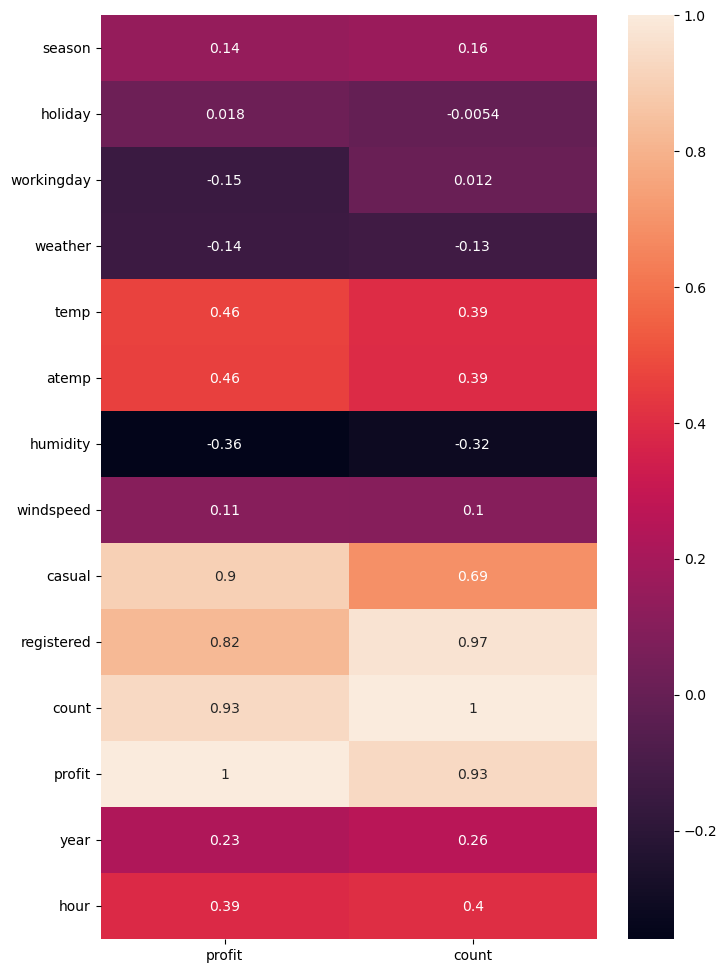

In [99]:
plt.figure(figsize=(8,12))
sns.heatmap(df.corr()[['profit','count']],annot=True)

In [100]:
## rental and frofit during rush hour 7:9 and 2:5

In [109]:
def rush(hour):
    return 1 if hour in [7,8,9,14,15,16,17]  else 0
df['rush_hour']=df['hour'].apply(rush)

In [118]:
df.sample()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,profit,year,month_name,day_of_weak,hour,rush_hour
7072,2012-04-13 01:00:00,2,0,1,1,14.76,17.425,46,12.998,2,28,30,154.628767,2012,April,Friday,1,0


In [123]:
df['rush_hour'].value_counts()

0    7697
1    3189
Name: rush_hour, dtype: int64

In [126]:
df.groupby('rush_hour')['profit'].describe().T

rush_hour,0,1
count,7697.000000,3189.000000
mean,1012.505862,1953.893584
std,1170.970639,1385.526596
min,4.128767,4.128767
25%,141.728767,941.528767
50%,588.928767,1672.528767
75%,1461.828767,2635.728767
max,7864.528767,7881.728767


In [127]:
df.groupby('rush_hour')['count'].describe().T

rush_hour,0,1
count,7697.000000,3189.000000
mean,147.790698,297.250235
std,157.846005,189.974794
min,1.000000,1.000000
25%,23.000000,154.000000
50%,100.000000,265.000000
75%,217.000000,407.000000
max,977.000000,970.000000


In [128]:
# rental &profit during working day and holiday

In [129]:
df.groupby('workingday')['profit'].describe().T

workingday,0,1
count,3474.000000,7412.000000
mean,1575.484179,1153.668675
std,1657.985547,1083.659550
min,4.128767,4.128767
25%,283.628767,236.328767
50%,887.778767,889.928767
75%,2493.828767,1758.528767
max,7881.728767,6338.028767


In [130]:
df.groupby('holiday')['profit'].describe().T

holiday,0,1
count,10575.000000,311.000000
mean,1284.160493,1428.382786
std,1305.224861,1448.518613
min,4.128767,4.128767
25%,253.528767,251.378767
50%,889.928767,877.028767
75%,1883.228767,2371.278767
max,7881.728767,5426.428767


In [131]:
#registerd or causual is more

In [141]:
df.corr()[['profit','count']].loc[['casual','registered']]

/tmp/ipykernel_32/2322640703.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[['profit','count']].loc[['casual','registered']]


,profit,count
casual,0.902713,0.690414
registered,0.822156,0.970948


In [142]:
## profit during school monthes(10:12),(2,6)


In [143]:
df.sample()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,profit,year,month_name,day_of_weak,hour,rush_hour
7552,2012-05-14 01:00:00,2,0,1,2,24.6,30.305,60,19.0012,5,6,11,111.628767,2012,May,Monday,1,0


In [146]:
df['month_name'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [148]:
df['schools']=df['month_name'].apply(lambda x:1 if x in ['October', 'November', 'December', 'February', 'March', 'April', 'May', 'June'] else 0)

In [150]:
df['schools'].value_counts()

1    7269
0    3617
Name: schools, dtype: int64

In [154]:
df.groupby('schools')[['profit','count']].describe().T

schools                 0            1
profit count  3617.000000  7269.000000
       mean   1391.302585  1237.017858
       std    1369.026877  1276.130142
       min       4.128767     4.128767
       25%     266.428767   244.928767
       50%     980.228767   859.828767
       75%    2115.428767  1784.328767
       max    7881.728767  7864.528767
count  count  3617.000000  7269.000000
       mean    199.210948   187.774109
       std     188.194898   177.422680
       min       1.000000     1.000000
       25%      43.000000    42.000000
       50%     151.000000   142.000000
       75%     298.000000   275.000000
       max     977.000000   948.000000

In [158]:
df.corr()[['profit','count']].loc['schools']

/tmp/ipykernel_32/828169538.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()[['profit','count']].loc['schools']


profit   -0.055491
count    -0.029740
Name: schools, dtype: float64

# data visualization

In [159]:
df.sample()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,profit,year,month_name,day_of_weak,hour,rush_hour,schools
7631,2012-05-17 08:00:00,2,0,1,1,21.32,25.0,55,30.0026,29,605,634,3100.128767,2012,May,Thursday,8,1,1


#### numerical _univariate

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


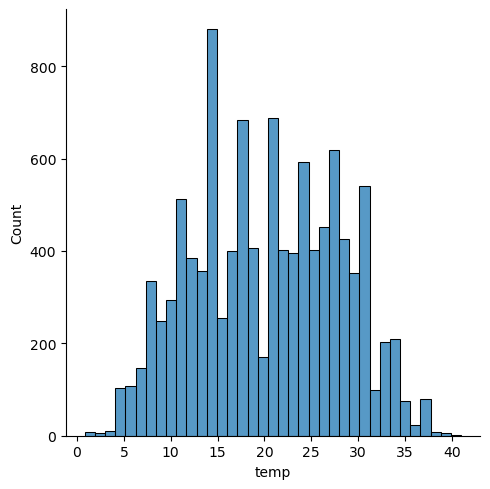

In [160]:
sns.displot(data=df,x='temp')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


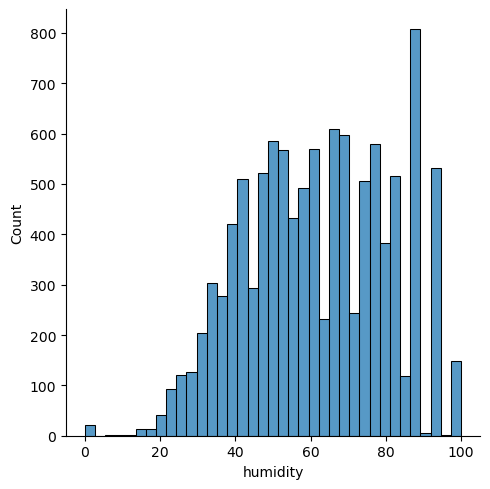

In [163]:
sns.displot(data=df,x='humidity')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


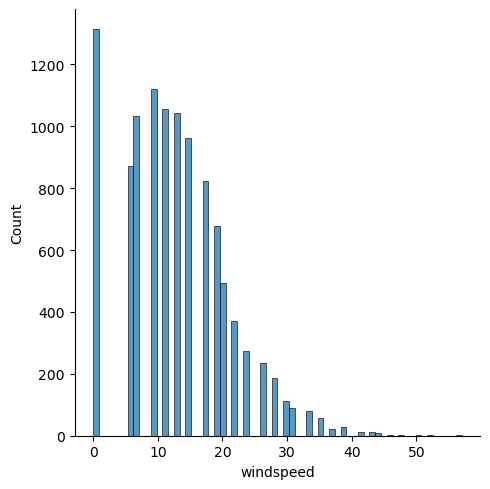

In [164]:
sns.displot(data=df,x='windspeed')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


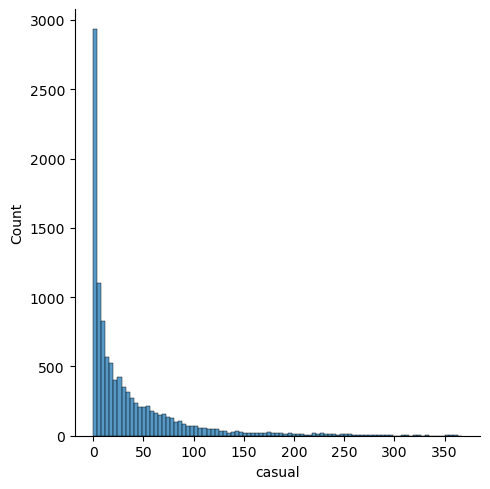

In [165]:
sns.displot(data=df,x='casual')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


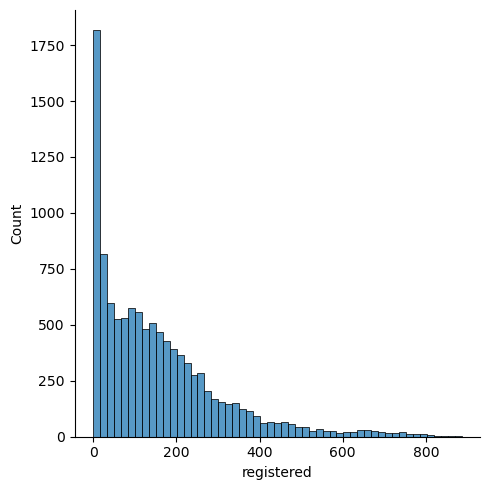

In [166]:
sns.displot(data=df,x='registered')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


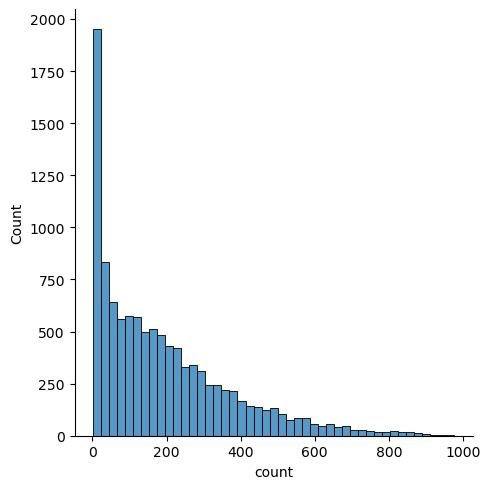

In [167]:
sns.displot(data=df,x='count')

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


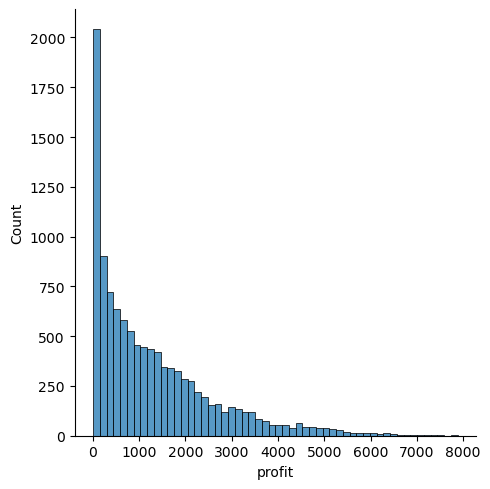

In [168]:
sns.displot(data=df,x='profit')

### numerical featueres -Bivariate

In [183]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'profit', 'year', 'month_name', 'day_of_weak', 'hour', 'rush_hour',
       'schools'],
      dtype='object')

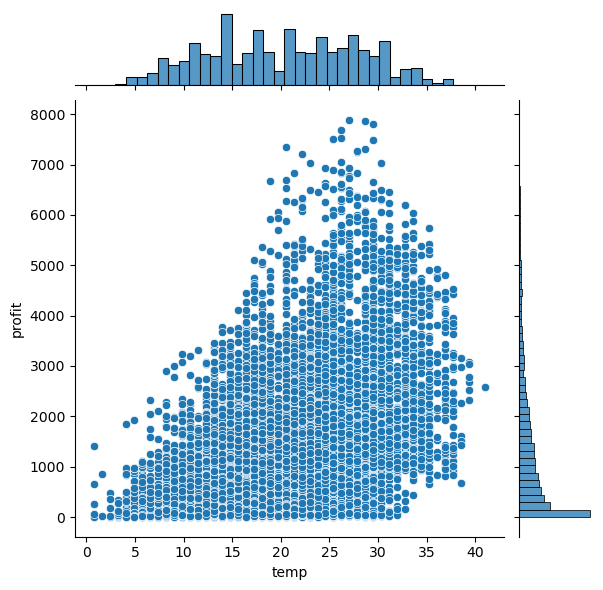

In [184]:
sns.jointplot(data=df,x='temp',y='profit')

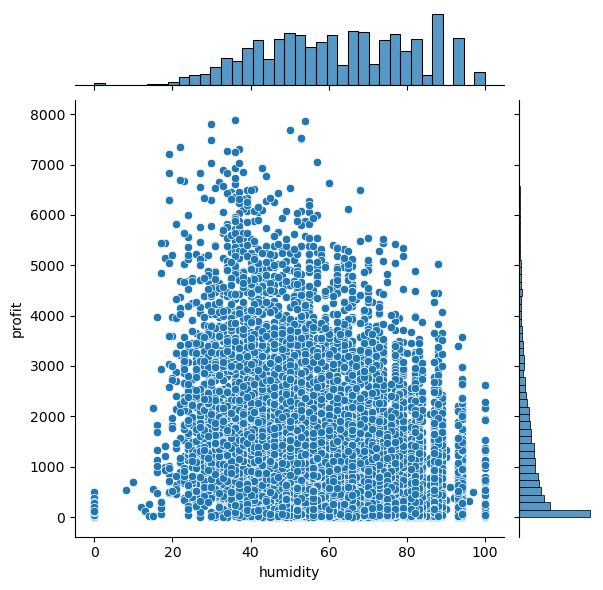

In [185]:
sns.jointplot(data=df,x='humidity',y='profit')

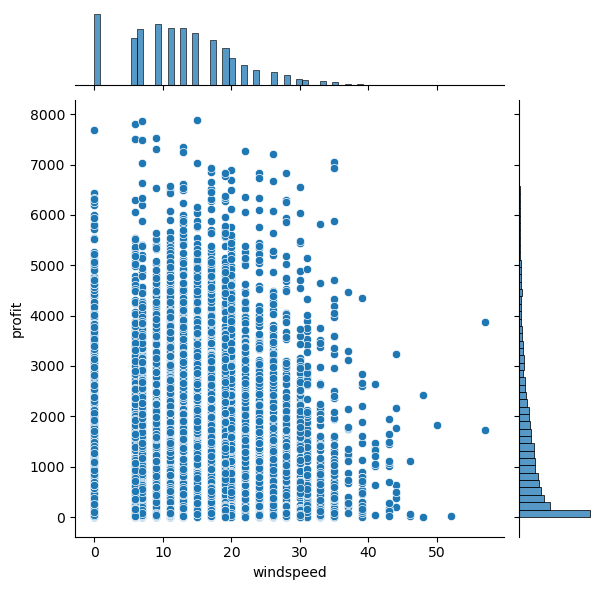

In [186]:
sns.jointplot(data=df,x='windspeed',y='profit')

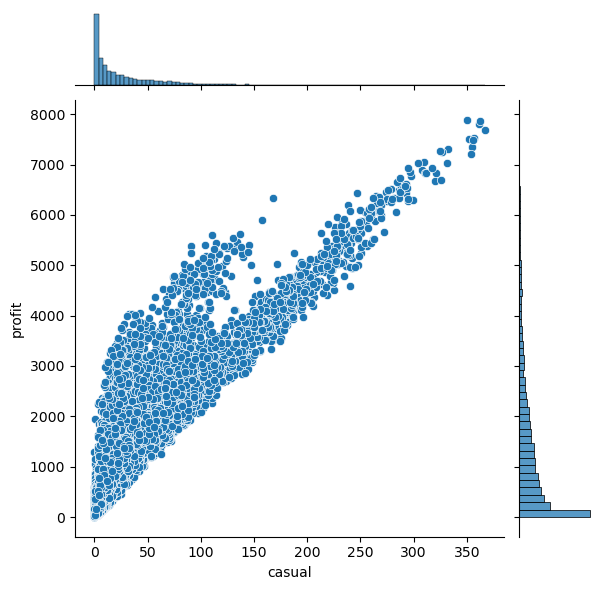

In [187]:
sns.jointplot(data=df,x='casual',y='profit')

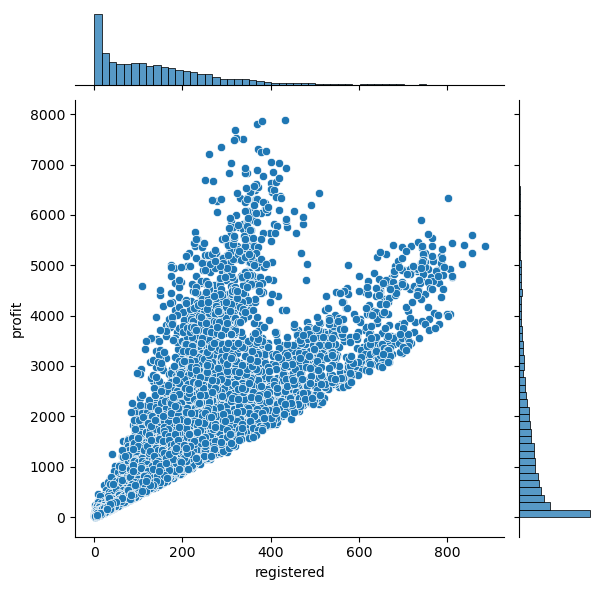

In [188]:
sns.jointplot(data=df,x='registered',y='profit')

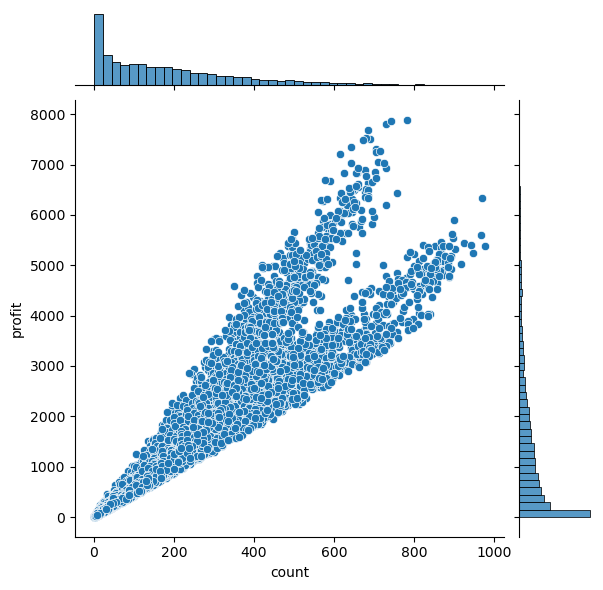

In [189]:
sns.jointplot(data=df,x='count',y='profit')

## categorical features

In [190]:
df.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'profit', 'year', 'month_name', 'day_of_weak', 'hour', 'rush_hour',
       'schools'],
      dtype='object')

<Axes: xlabel='season', ylabel='count'>

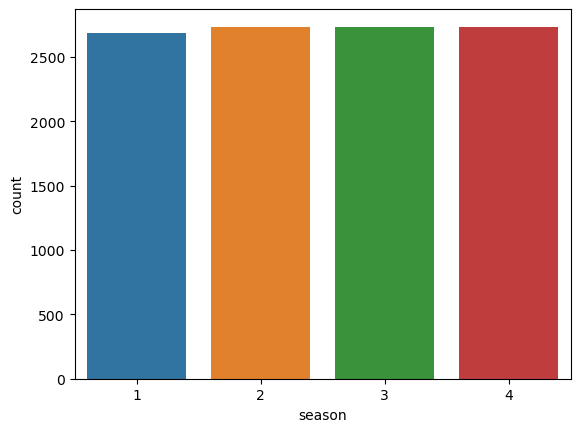

In [191]:
sns.countplot(data=df,x='season')

<Axes: xlabel='holiday', ylabel='count'>

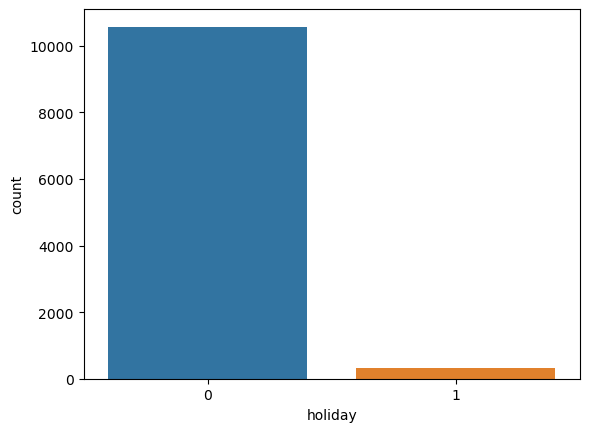

In [192]:
sns.countplot(data=df,x='holiday')

<Axes: xlabel='workingday', ylabel='count'>

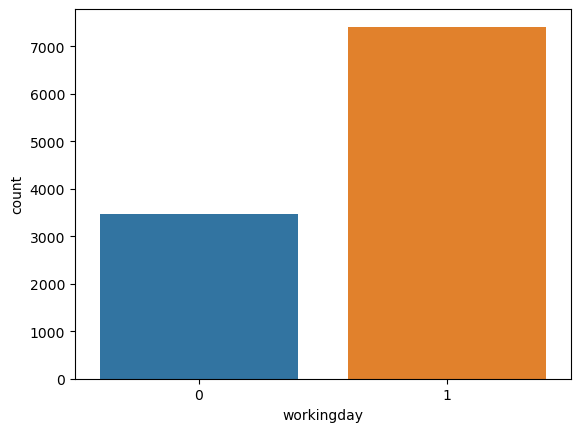

In [193]:
sns.countplot(data=df,x='workingday')

<Axes: xlabel='weather', ylabel='count'>

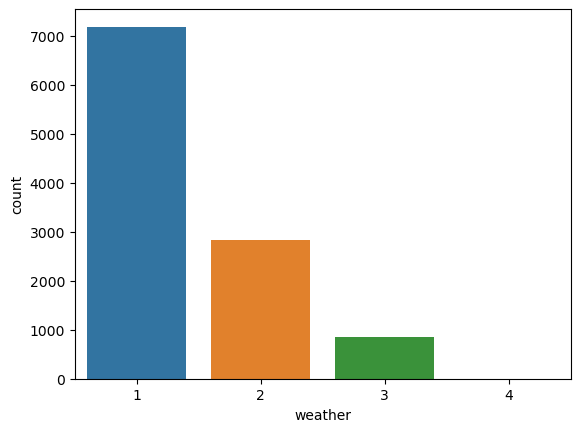

In [194]:
sns.countplot(data=df,x='weather')

<Axes: xlabel='year', ylabel='count'>

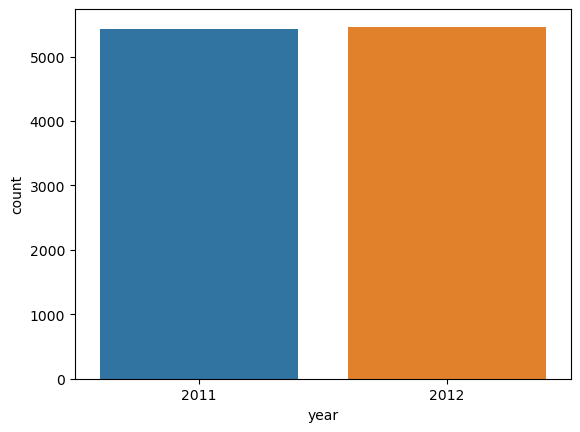

In [195]:
sns.countplot(data=df,x='year')

<Axes: xlabel='month_name', ylabel='count'>

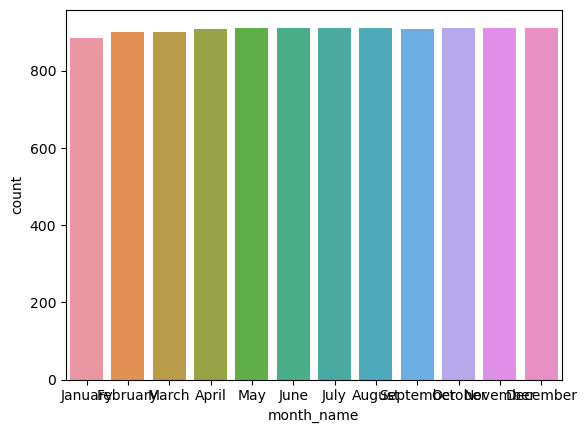

In [196]:
sns.countplot(data=df,x='month_name')

<Axes: xlabel='day_of_weak', ylabel='count'>

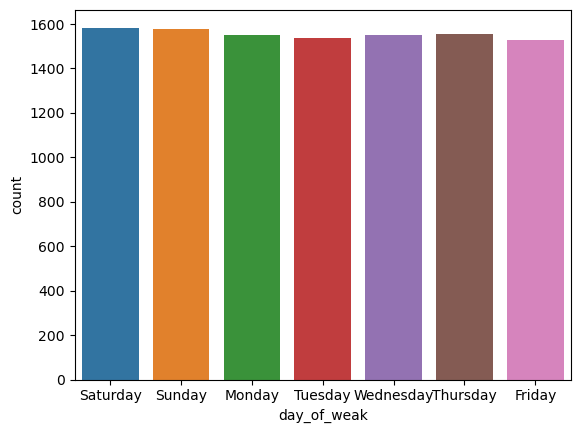

In [197]:
sns.countplot(data=df,x='day_of_weak')

<Axes: xlabel='hour', ylabel='count'>

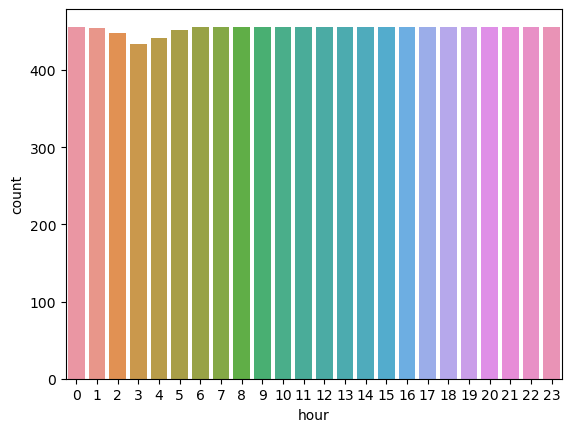

In [198]:
sns.countplot(data=df,x='hour')

<Axes: xlabel='rush_hour', ylabel='count'>

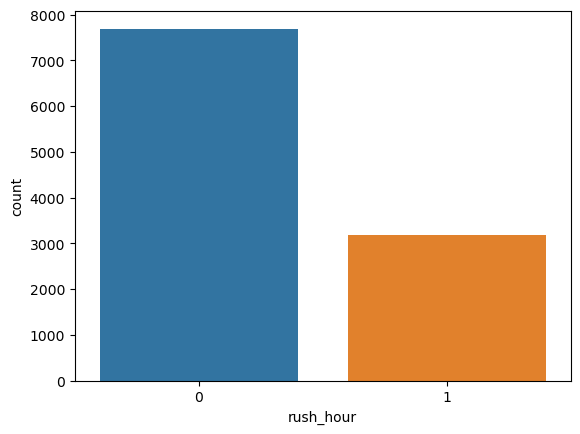

In [199]:
sns.countplot(data=df,x='rush_hour')

<Axes: xlabel='schools', ylabel='count'>

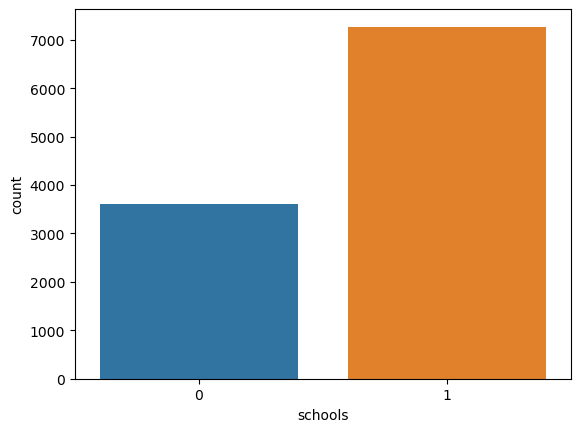

In [200]:
sns.countplot(data=df,x='schools')

## Bivariate

<Axes: xlabel='season', ylabel='profit'>

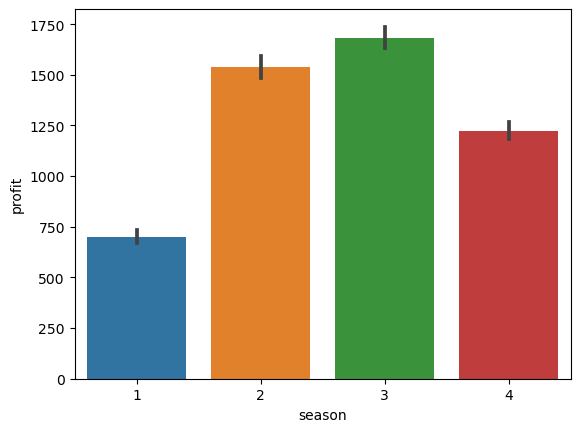

In [203]:
sns.barplot(data=df,x='season',y='profit')

<Axes: xlabel='holiday', ylabel='profit'>

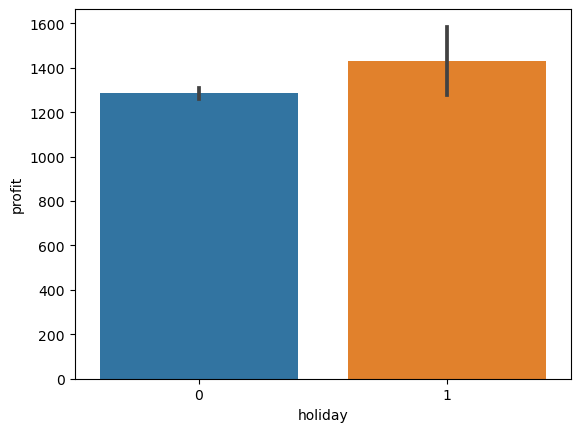

In [206]:
sns.barplot(data=df,x='holiday',y='profit')

<Axes: xlabel='workingday', ylabel='profit'>

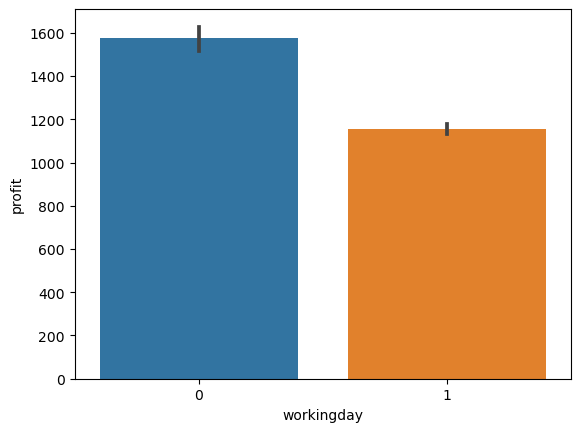

In [213]:
sns.barplot(data=df,x='workingday',y='profit')

<Axes: xlabel='weather', ylabel='profit'>

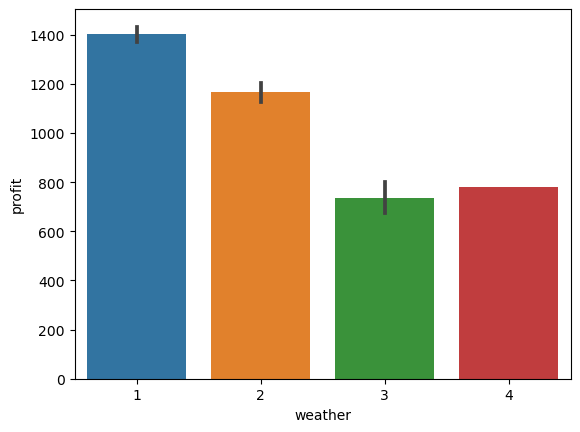

In [214]:
sns.barplot(data=df,x='weather',y='profit')

<Axes: xlabel='month_name', ylabel='profit'>

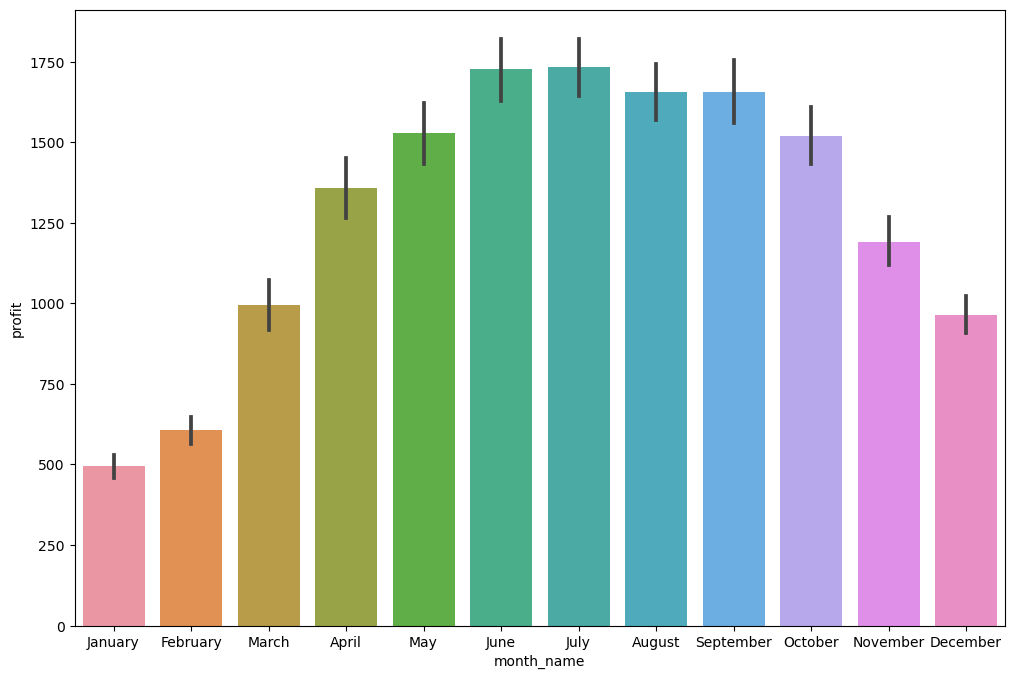

In [219]:
plt.figure(figsize=(12,8))
sns.barplot(data=df,x='month_name',y='profit')

<Axes: xlabel='day_of_weak', ylabel='profit'>

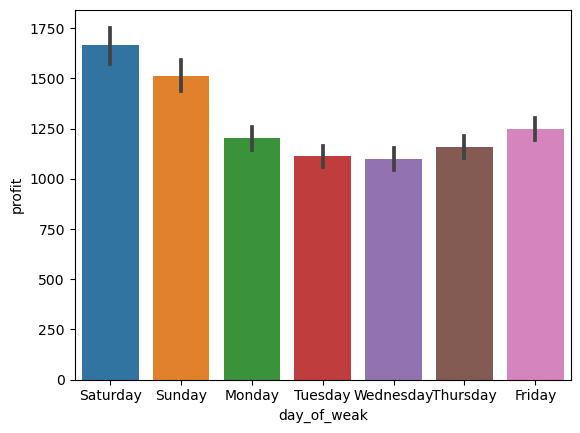

In [216]:
sns.barplot(data=df,x='day_of_weak',y='profit')

<Axes: xlabel='day_of_weak', ylabel='profit'>

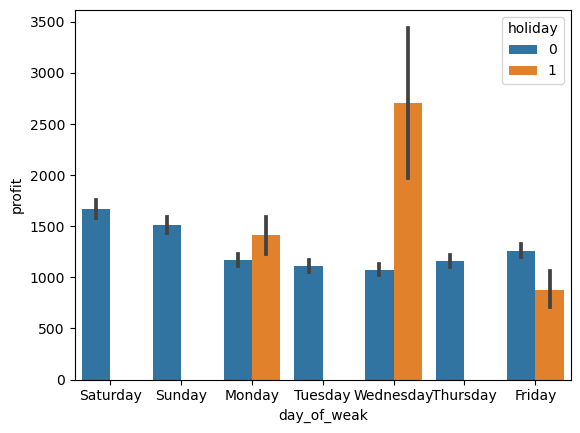

In [220]:
sns.barplot(data=df,x='day_of_weak',y='profit',hue='holiday')

<Axes: xlabel='hour', ylabel='profit'>

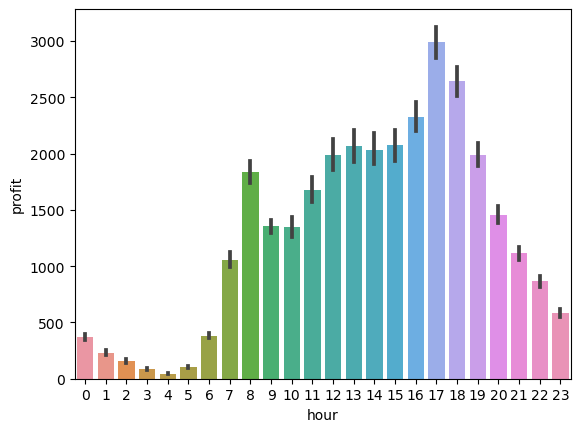

In [210]:
sns.barplot(data=df,x='hour',y='profit')

<Axes: xlabel='rush_hour', ylabel='profit'>

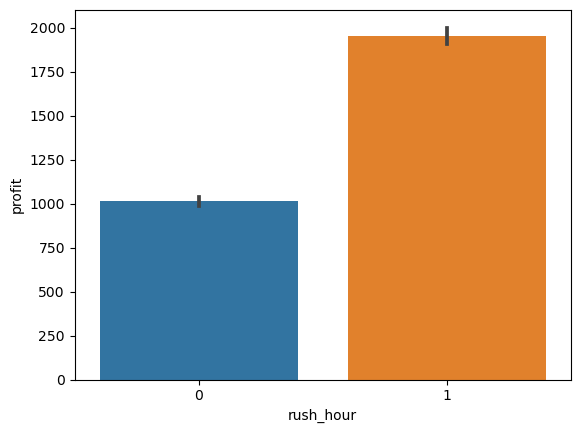

In [211]:
sns.barplot(data=df,x='rush_hour',y='profit')

<Axes: xlabel='schools', ylabel='profit'>

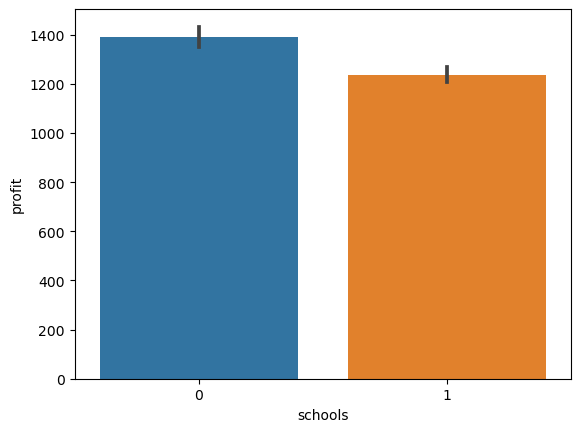

In [212]:
sns.barplot(data=df,x='schools',y='profit')

/tmp/ipykernel_32/1626161939.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

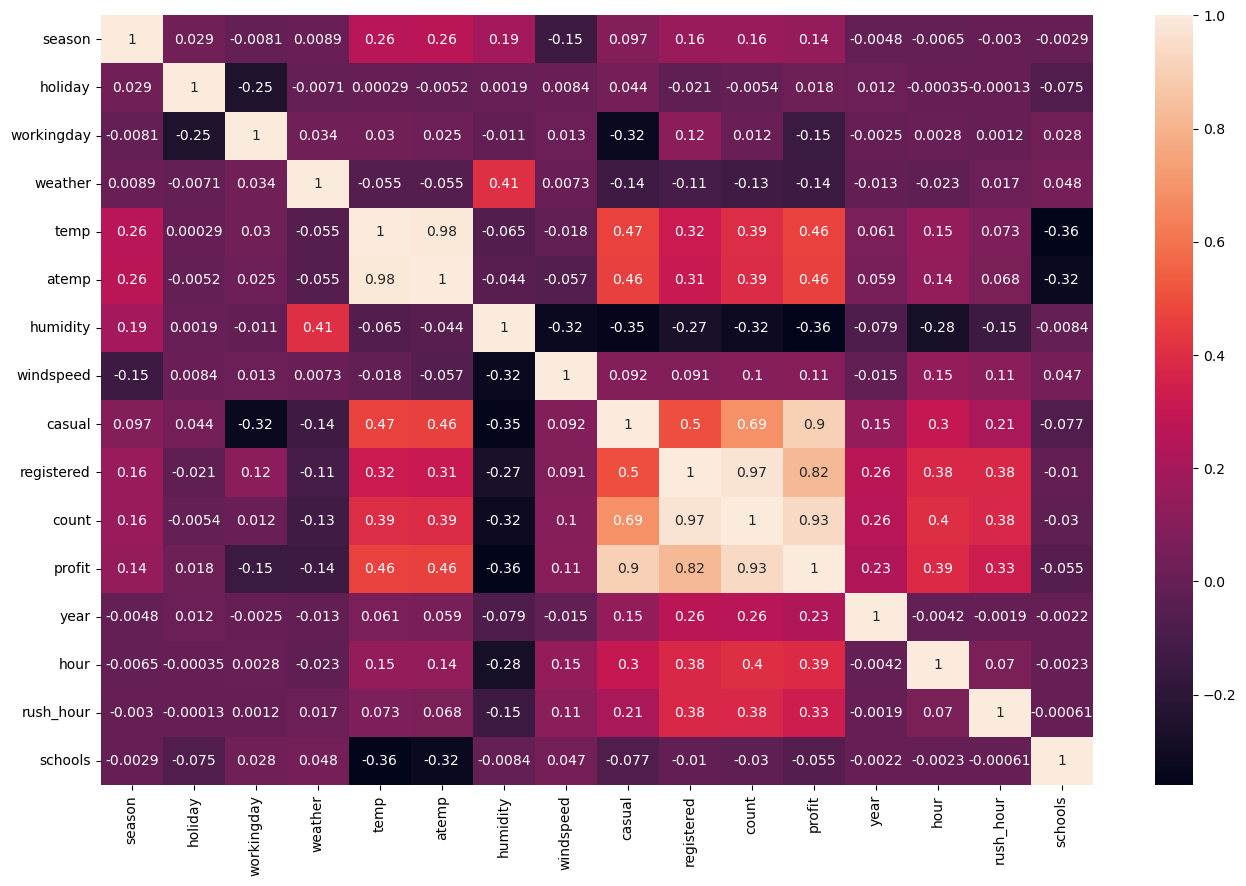

In [226]:
plt.figure(figsize=(16,10))

sns.heatmap(df.corr(),annot=True)


### `Data preprocising

In [231]:
df.sample()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,profit,year,month_name,day_of_weak,hour,rush_hour,schools,month
8667,2012-08-03 12:00:00,3,0,1,2,35.26,40.91,50,19.9995,95,243,338,2678.728767,2012,August,Friday,12,0,0,8


In [232]:
df=pd.get_dummies(data=df,columns=['season','weather','day_of_weak'],drop_first=True)

In [233]:
df

,datetime,holiday,workingday,temp,atemp,humidity,windspeed,casual,registered,count,...,season_4,weather_2,weather_3,weather_4,day_of_weak_Monday,day_of_weak_Saturday,day_of_weak_Sunday,day_of_weak_Thursday,day_of_weak_Tuesday,day_of_weak_Wednesday
0,2011-01-01 00:00:00,0,0,9.84,14.395,81,0.0000,3,13,16,...,0,0,0,0,0,1,0,0,0,0
1,2011-01-01 01:00:00,0,0,9.02,13.635,80,0.0000,8,32,40,...,0,0,0,0,0,1,0,0,0,0
2,2011-01-01 02:00:00,0,0,9.02,13.635,80,0.0000,5,27,32,...,0,0,0,0,0,1,0,0,0,0
3,2011-01-01 03:00:00,0,0,9.84,14.395,75,0.0000,3,10,13,...,0,0,0,0,0,1,0,0,0,0
4,2011-01-01 04:00:00,0,0,9.84,14.395,75,0.0000,0,1,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,0,1,15.58,19.695,50,26.0027,7,329,336,...,1,0,0,0,0,0,0,0,0,1
10882,2012-12-19 20:00:00,0,1,14.76,17.425,57,15.0013,10,231,241,...,1,0,0,0,0,0,0,0,0,1
10883,2012-12-19 21:00:00,0,1,13.94,15.910,61,15.0013,4,164,168,...,1,0,0,0,0,0,0,0,0,1
10884,2012-12-19 22:00:00,0,1,13.94,17.425,61,6.0032,12,117,129,...,1,0,0,0,0,0,0,0,0,1


In [234]:
df.columns

Index(['datetime', 'holiday', 'workingday', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'profit', 'year',
       'month_name', 'hour', 'rush_hour', 'schools', 'month', 'season_2',
       'season_3', 'season_4', 'weather_2', 'weather_3', 'weather_4',
       'day_of_weak_Monday', 'day_of_weak_Saturday', 'day_of_weak_Sunday',
       'day_of_weak_Thursday', 'day_of_weak_Tuesday', 'day_of_weak_Wednesday'],
      dtype='object')

In [240]:
df.drop(columns=['datetime', 'atemp', 'windspeed', 'casual', 'registered', 'year', 'month_name', 'rush_hour', 'schools'],inplace=True)


In [241]:
df

,holiday,workingday,temp,humidity,count,profit,hour,month,season_2,season_3,season_4,weather_2,weather_3,weather_4,day_of_weak_Monday,day_of_weak_Saturday,day_of_weak_Sunday,day_of_weak_Thursday,day_of_weak_Tuesday,day_of_weak_Wednesday
0,0,0,9.84,81,16,107.328767,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,9.02,80,40,275.028767,1,1,0,0,0,0,0,0,0,1,0,0,0,0
2,0,0,9.02,80,32,201.928767,2,1,0,0,0,0,0,0,0,1,0,0,0,0
3,0,0,9.84,75,13,94.428767,3,1,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,9.84,75,1,4.128767,4,1,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,15.58,50,336,1534.928767,19,12,0,0,1,0,0,0,0,0,0,0,0,1
10882,0,1,14.76,57,241,1165.128767,20,12,0,0,1,0,0,0,0,0,0,0,0,1
10883,0,1,13.94,61,168,773.828767,21,12,0,0,1,0,0,0,0,0,0,0,0,1
10884,0,1,13.94,61,129,709.328767,22,12,0,0,1,0,0,0,0,0,0,0,0,1


In [244]:
x=df.drop('profit',axis=1)
y=df['profit']

### split data

In [246]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30)

In [247]:
## scalling data

In [248]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [250]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [258]:
from sklearn.metrics import r2_score,mean_absolute_error

In [259]:
from sklearn.linear_model import LinearRegression 

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import RandomForestRegressor

from sklearn.svm import SVR

In [268]:
def select_model(m):
    model=m()
    model.fit(x_train,y_train)
    predict=model.predict(x_test)
    print('tarin score : ',model.score(x_train,y_train))
    print('test score : ',model.score(x_test,y_test))
    print('mean error : ',mean_absolute_error(y_test,predict))
    print('r2 score : ',r2_score(y_test,predict))
    

In [269]:
select_model(LinearRegression)

tarin score :  0.9183780187000188
test score :  -4.727896940073961e+21
mean error :  56168444463459.125
r2 score :  -4.727896940073961e+21


In [271]:
select_model(KNeighborsRegressor)

tarin score :  0.9626326264357519
test score :  0.9314898759228164
mean error :  220.92494182486226
r2 score :  0.9314898759228164


In [272]:
select_model(DecisionTreeRegressor)

tarin score :  0.9999987320450225
test score :  0.9687504732941986
mean error :  141.22721984078385
r2 score :  0.9687504732941986


In [273]:
select_model(RandomForestRegressor)

tarin score :  0.9976050526479229
test score :  0.9836164571049277
mean error :  101.96603955909372
r2 score :  0.9836164571049277


In [274]:
select_model(SVR)

tarin score :  0.14566357707486988
test score :  0.14167247584353626
mean error :  824.4661983768497
r2 score :  0.14167247584353626


In [275]:
## the best score is random forest

In [276]:
R=RandomForestRegressor()
R.fit(x_train,y_train)

RandomForestRegressor()

In [277]:

print('mean error : ',mean_absolute_error(y_test,R.predict(x_test)))
print('r2 score : ',r2_score(y_test,R.predict(x_test)))

mean error :  101.90843061849361
r2 score :  0.9837511083632099
